In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("MAR_SA.csv")
data = data.dropna()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

marathi_stopwords = [
    'अधिक', 'अनेक', 'अशी', 'असलयाचे', 'असलेल्या', 'असा', 'असून', 'असे', 'आज', 'आणि', 'आता', 'आपलं', 'आपला', 'आपल्या', 'आलं', 'आला', 'आली', 'आले', 'आहे', 'आहेत', 'एक', 'एका', 'कमी', 'करणयात', 'करून', 'का', 'काम', 'काय', 'काही', 'किव्हा', 'की', 'केलं', 'केला', 'केली', 'केले', 'कोटी', 'गेल्या', 'घेऊन', 'जात', 'झालं', 'झाला', 'झाली', 'झाले', 'झालेल्या', 'टा', 'डॉ', 'तर', 'तरी', 'तसेच', 'ता', 'ती', 'तीन', 'ते', 'तो', 'तोंड', 'न', 'नाही', 'निर्ण्य', 'पण', 'पम', 'परयतन', 'पाटील', 'मात्र', 'माहिती', 'मी', 'मुबी', 'म्हणजे', 'म्हणाले', 'म्हणून', 'या', 'याचा', 'याची', 'याच्या', 'याना', 'यानी', 'येणार', 'येत', 'येथील', 'येथे', 'लाख', 'व', 'व्यकत', 'सर्व', 'सागित्लं', 'सुरु', 'हजार', 'हा', 'ही', 'हे', 'होणार', 'होत', 'होता', 'होती', 'होते', 'होतो'
]

stop_words = set(marathi_stopwords)

corpus = []
for i in range(0, len(data)):
    rvw = str(data.iloc[i, 0])
    rvw = re.sub('[^\u0900-\u097F]', ' ', rvw)
    rvw = rvw.lower()
    rvw = [word for word in rvw.split() if word not in stop_words]
    rvw = ' '.join(rvw)
    corpus.append(rvw)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

CntVctrzr = CountVectorizer()
X = CntVctrzr.fit_transform(corpus).toarray()
y = data.iloc[:, 1]

In [ ]:
from sklearn.model_selection import train_test_split

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Models = [
    SVC(kernel = 'linear', random_state = 0),
    SVC(kernel = 'rbf', random_state = 0),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    MultinomialNB(),
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
    LogisticRegression(random_state=0, max_iter=1000)
]

accuracies = []
conf_matrices = []
for model in Models:
    model.fit(X_trn, y_trn)
    y_pred = model.predict(X_tst)
    accuracy = accuracy_score(y_tst, y_pred)
    accuracies.append(accuracy)
    conf_matrices.append(confusion_matrix(y_tst, y_pred))

In [ ]:
for model in Models:
  print(f"Accuracy of {type(model).__name__}: {accuracy:.4f}")

Accuracy of SVC: 0.7273
Accuracy of SVC: 0.7273
Accuracy of KNeighborsClassifier: 0.7273
Accuracy of MultinomialNB: 0.7273
Accuracy of DecisionTreeClassifier: 0.7273
Accuracy of RandomForestClassifier: 0.7273
Accuracy of LogisticRegression: 0.7273


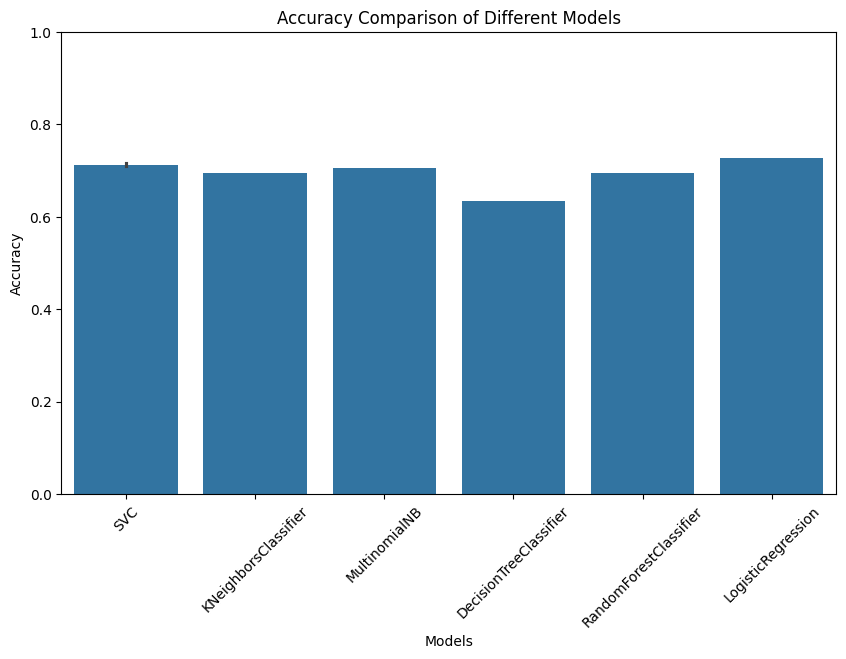

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=[type(model).__name__ for model in Models], y=accuracies)
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

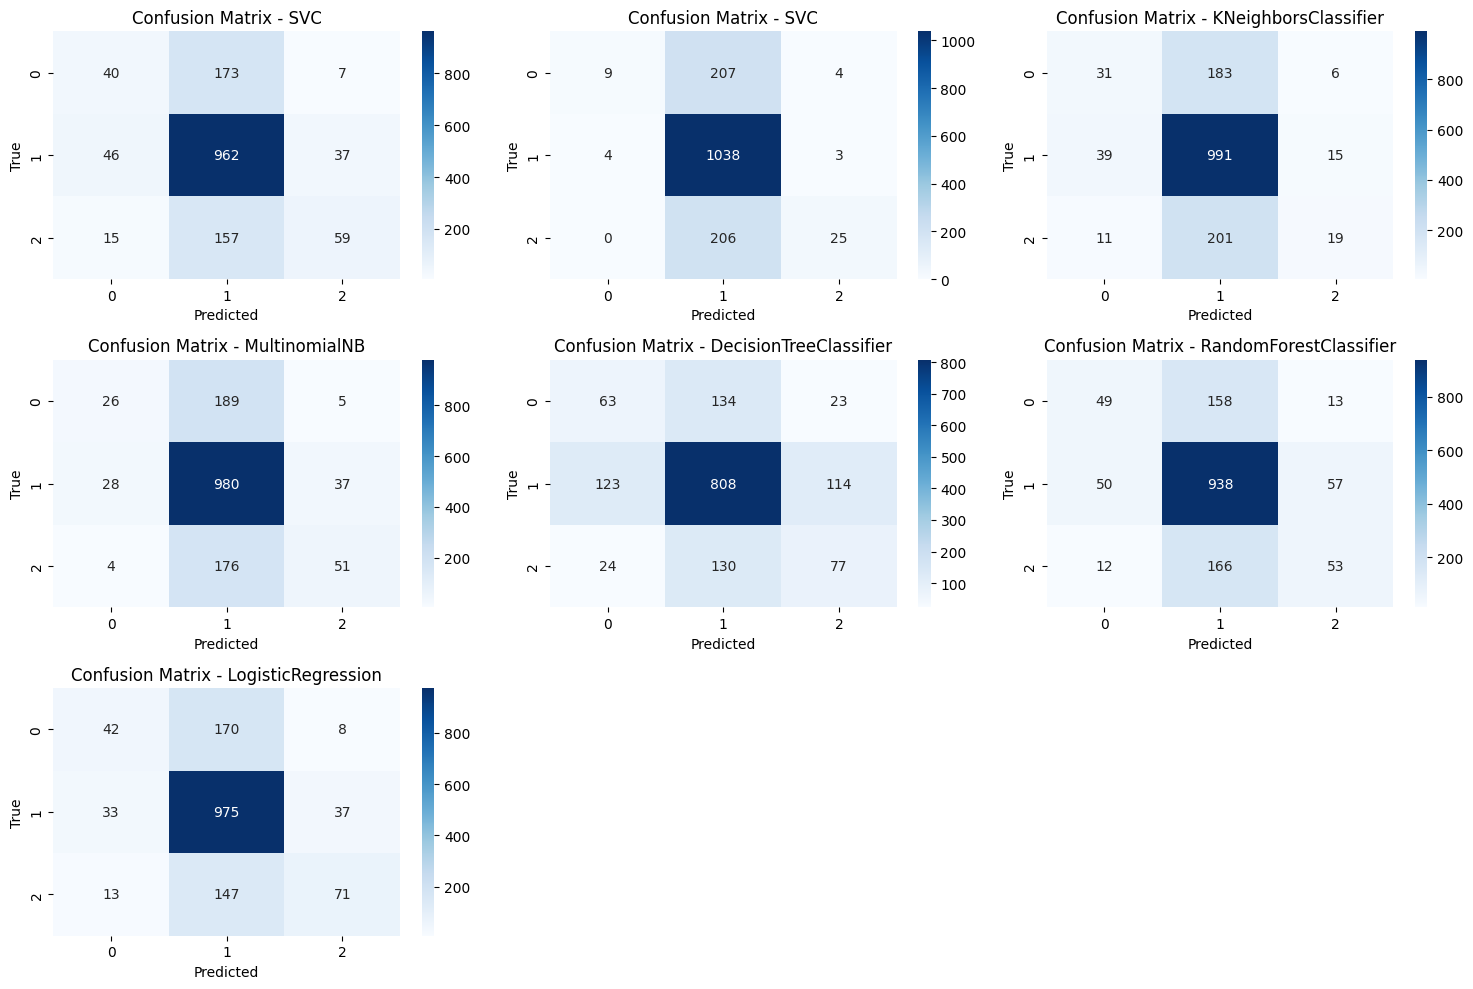

In [ ]:
plt.figure(figsize=(15, 10))
for i, conf_matrix in enumerate(conf_matrices, 1):
    plt.subplot(3, 3, i)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {type(Models[i-1]).__name__}')
plt.tight_layout()
plt.show()

In [ ]:


#test_text_features = CntVctrzr.transform([test_text])

# Predict the sentiment using the trained classifier
#predicted_sentiment = Clsfr.predict(test_text_features)

# Print the predicted sentiment
#print("Predicted Sentiment:", predicted_sentiment)

test_text = "त्यापैकी पाच जणांचा मृत्यू झाला आहे."
test_text_features = CntVctrzr.transform([test_text])
predicted_sentiment = clf.predict(test_text_features)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: [-1.]


In [ ]:
test_text = "माणसाला माणसाप्रमाणे वागवा."
test_text_features = CntVctrzr.transform([test_text])
predicted_sentiment = clf.predict(test_text_features)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: [1.]


In [ ]:
test_text = "त्याला मास्तर एडिसन म्हणत."
test_text_features = CntVctrzr.transform([test_text])
predicted_sentiment = clf.predict(test_text_features)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: [0.]


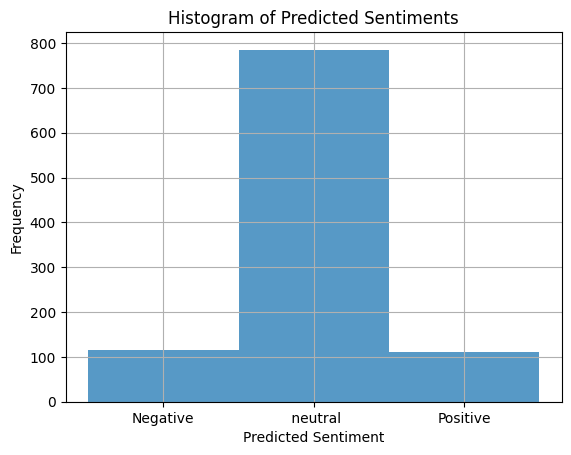

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_pred, bins=np.arange(min(y_pred), max(y_pred) + 1.5) - 0.5, alpha=0.75)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Sentiments')
plt.xticks([-1,1,0], ['Negative', 'Positive',' neutral'])
plt.grid(True)
plt.show()

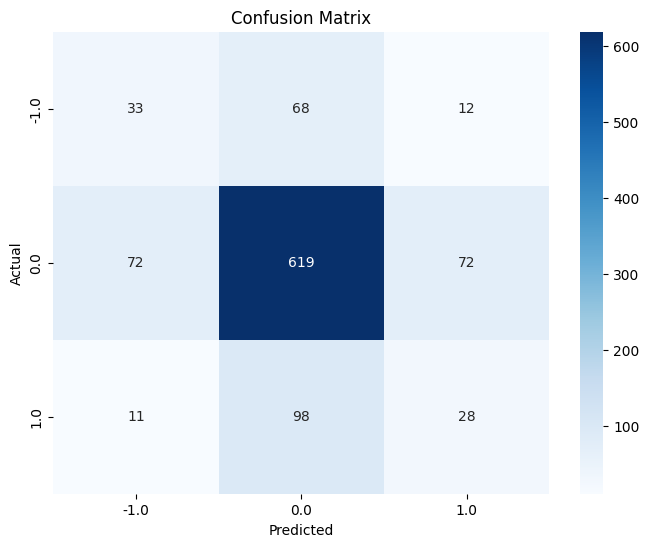

In [ ]:
import seaborn as sns

conf_matrix = pd.crosstab(y_tst, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

# Calculate precision


# Calculate recall
#recall = recall_score(y_tst, y_pred)

# Calculate F1 score
#f1 = f1_score(y_tst, y_pred)

# Calculate confusion matrix
#conf_matrix = confusion_matrix(y_tst, y_pred)

# Calculate ROC curve
#fpr, tpr, thresholds = roc_curve(y_tst, y_pred)

# Calculate AUC-ROC score
#auc_roc = roc_auc_score(y_tst, y_pred)

# Generate classification report
cls_report = classification_report(y_tst, y_pred)


print("Classification Report:\n", cls_report)


Classification Report:
               precision    recall  f1-score   support

        -1.0       0.28      0.29      0.29       113
         0.0       0.79      0.81      0.80       763
         1.0       0.25      0.20      0.22       137

    accuracy                           0.67      1013
   macro avg       0.44      0.44      0.44      1013
weighted avg       0.66      0.67      0.66      1013

